In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
# Définir le chemin du fichier dans Google Drive
file_path = "/content/drive/MyDrive/projet_machine_learning/StudentsPerformance.csv"
# Lire le fichier CSV
df = pd.read_csv(file_path)
# Afficher les premières lignes du DataFrame
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.columns


Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

##EDA

Aperçu des premières lignes:
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  

Informations sur le DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 col

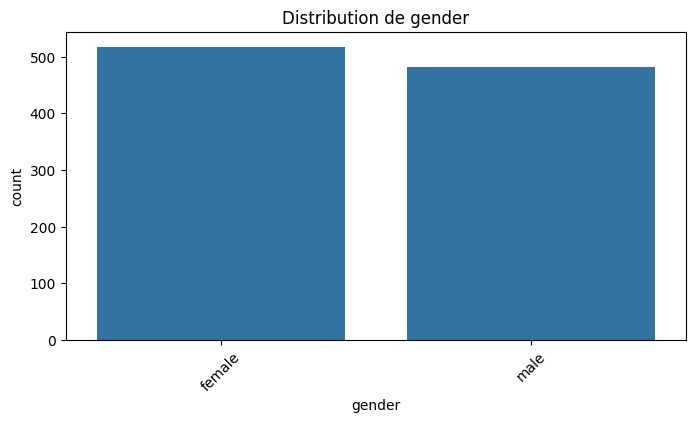


Distribution de race/ethnicity:
race/ethnicity
group C    31.9
group D    26.2
group B    19.0
group E    14.0
group A     8.9
Name: proportion, dtype: float64


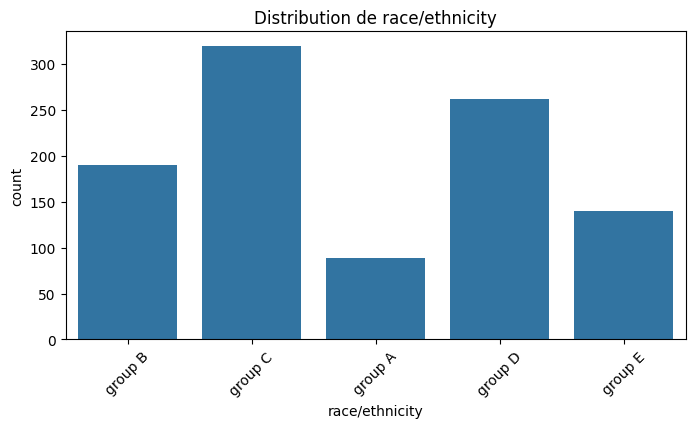


Distribution de parental level of education:
parental level of education
some college          22.6
associate's degree    22.2
high school           19.6
some high school      17.9
bachelor's degree     11.8
master's degree        5.9
Name: proportion, dtype: float64


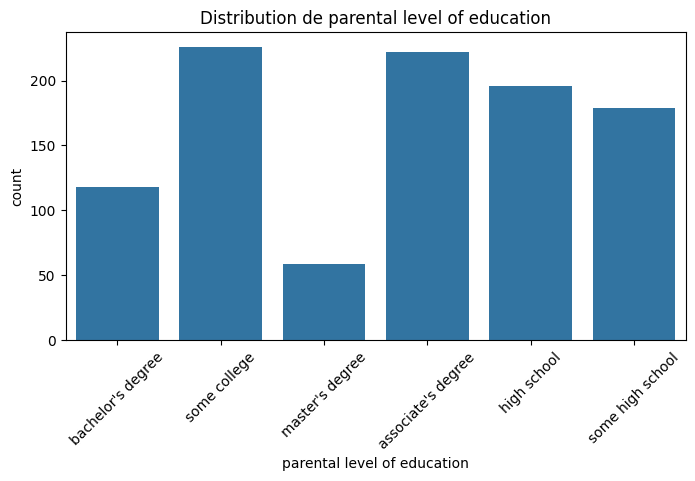


Distribution de lunch:
lunch
standard        64.5
free/reduced    35.5
Name: proportion, dtype: float64


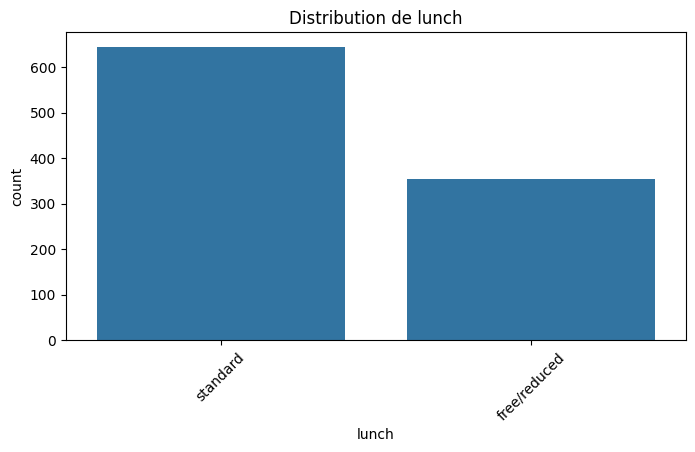


Distribution de test preparation course:
test preparation course
none         64.2
completed    35.8
Name: proportion, dtype: float64


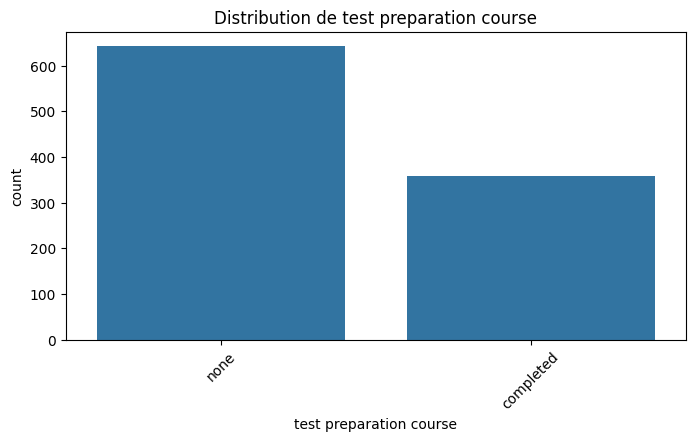


Distribution des variables numériques:


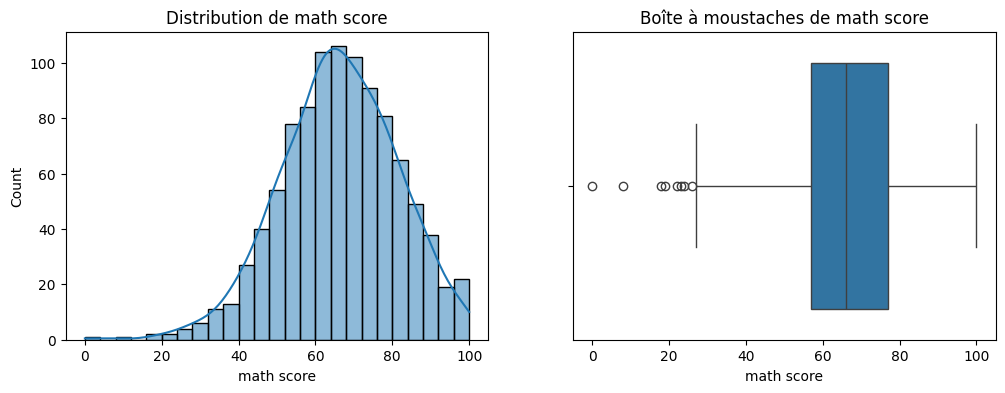

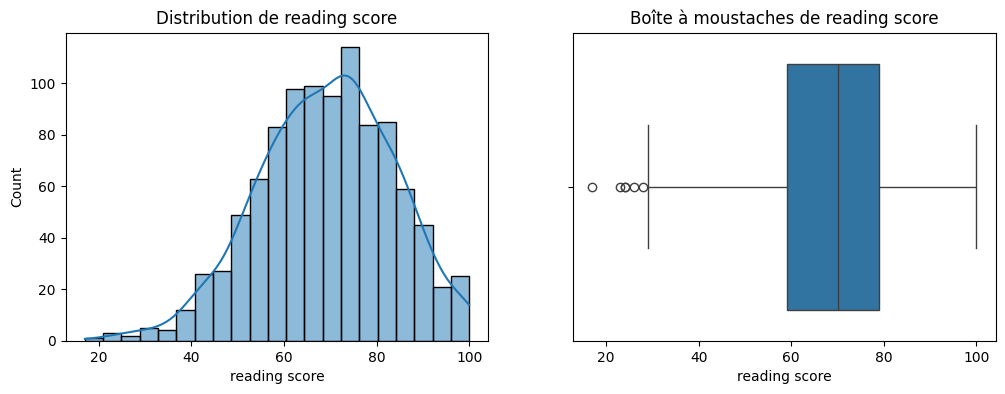

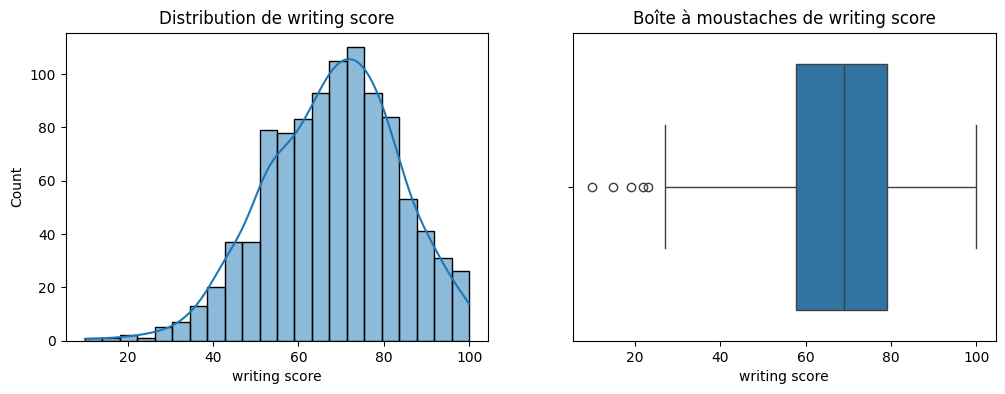


Matrice de corrélation entre les scores:


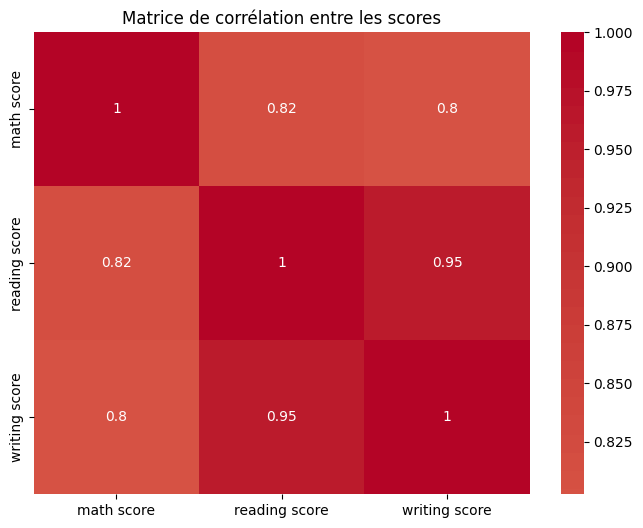

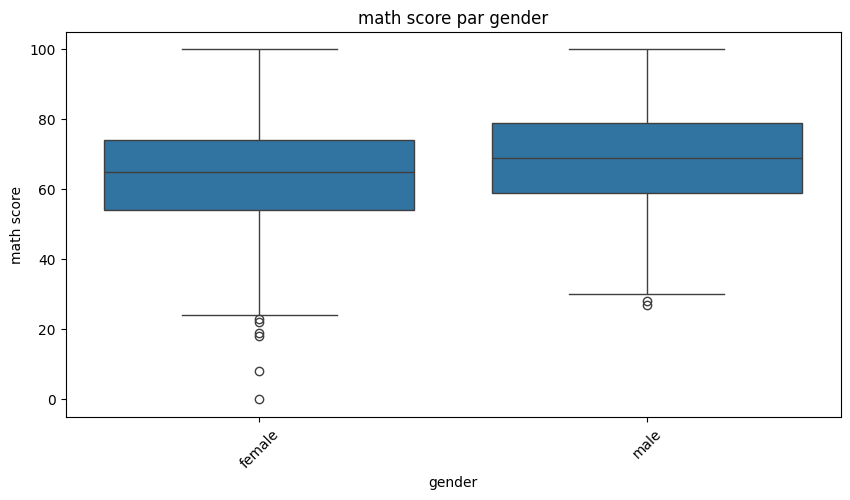

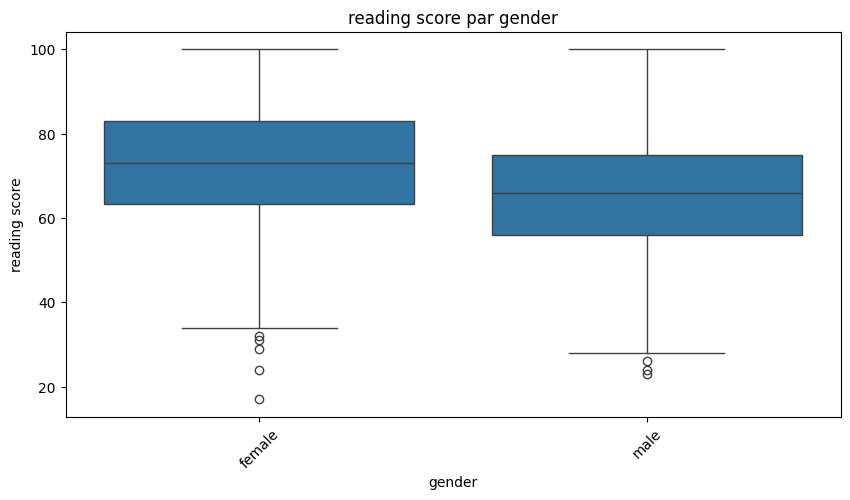

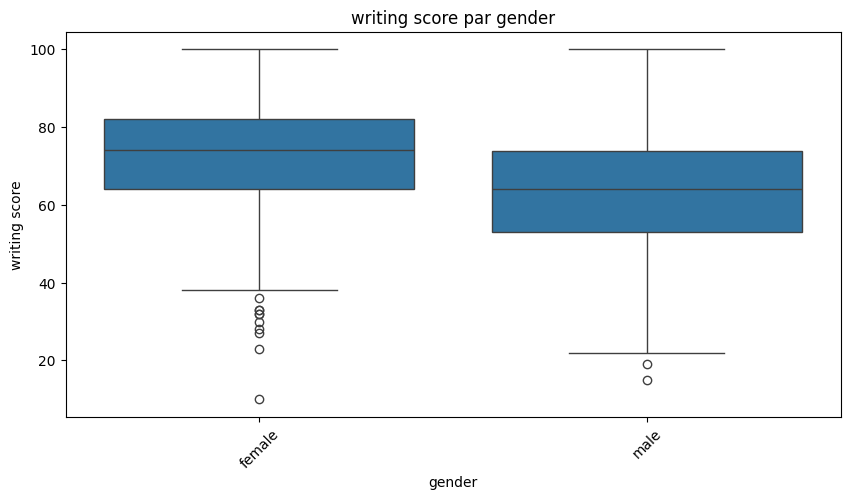

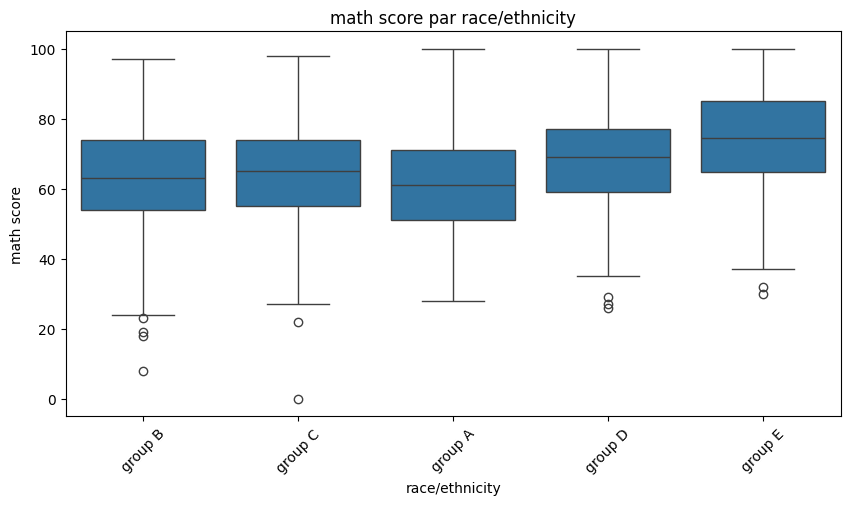

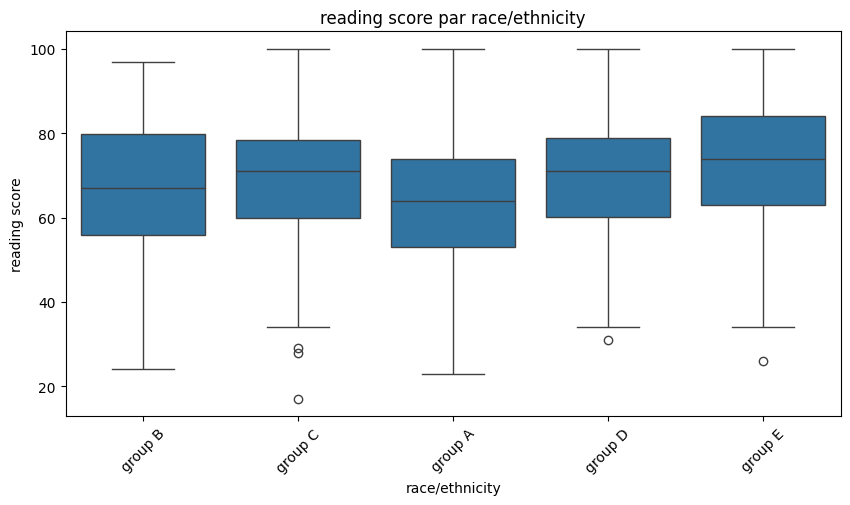

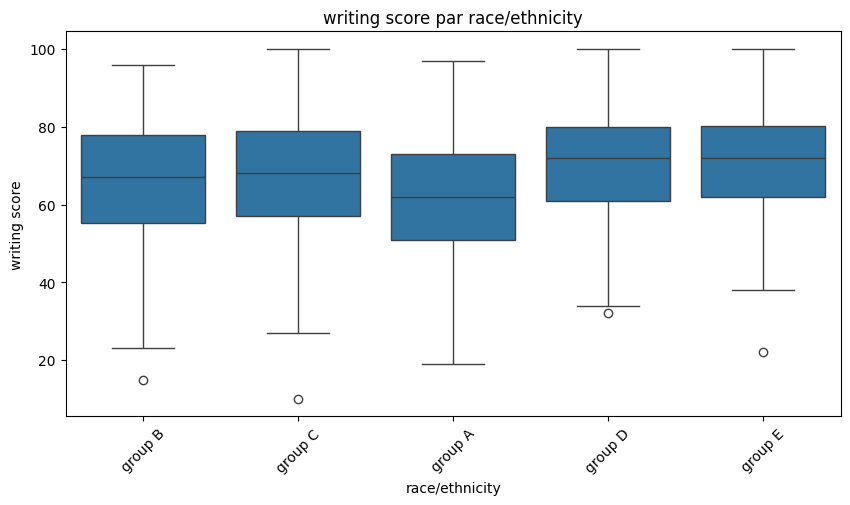

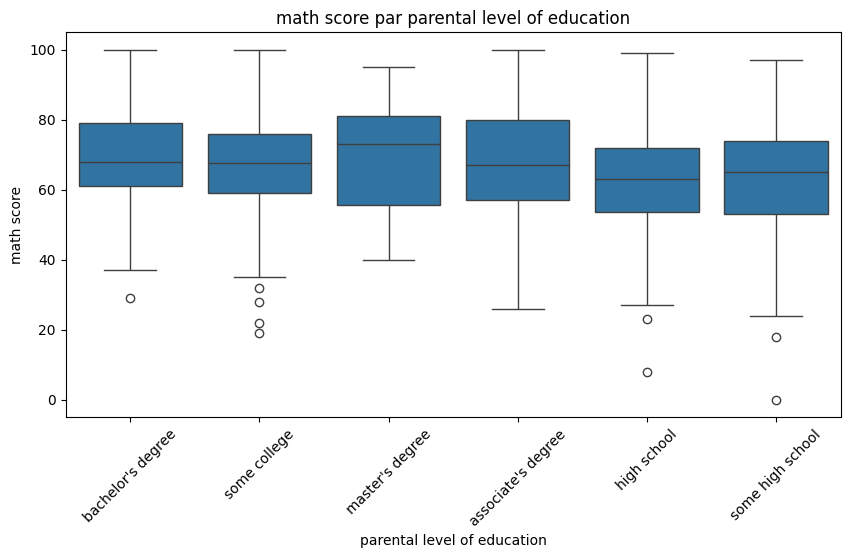

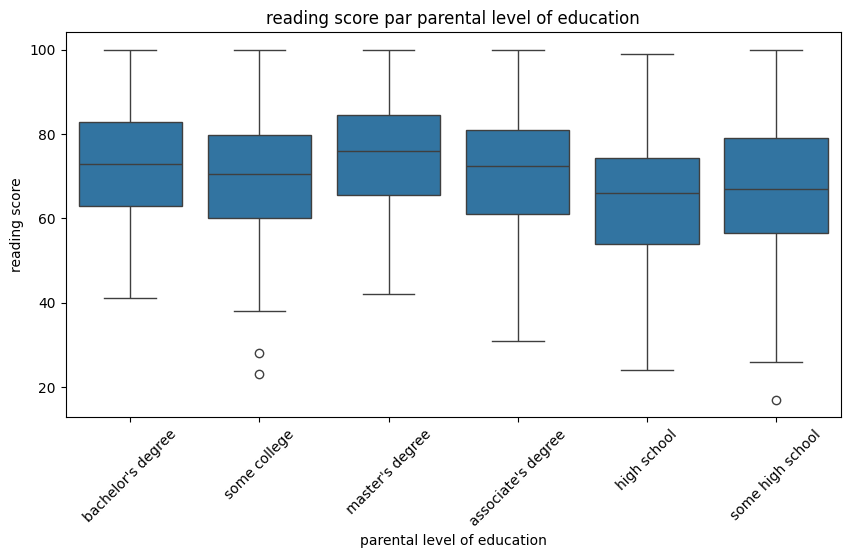

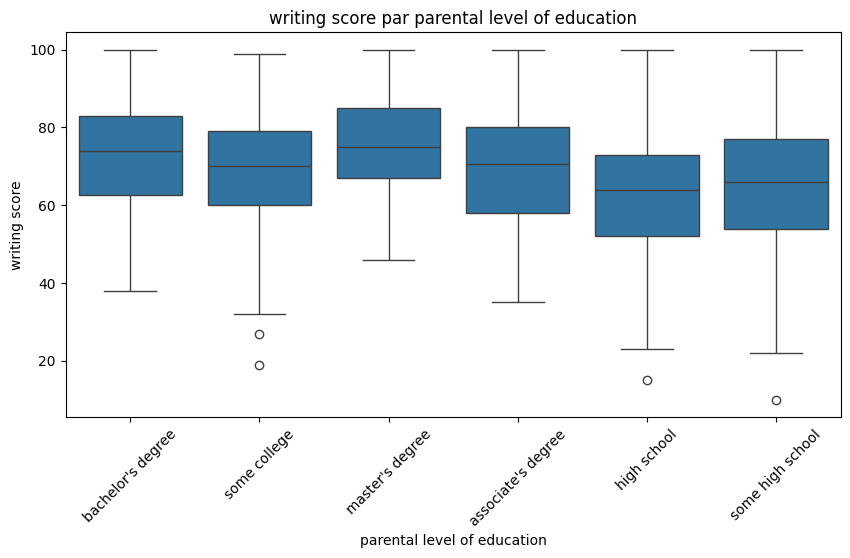

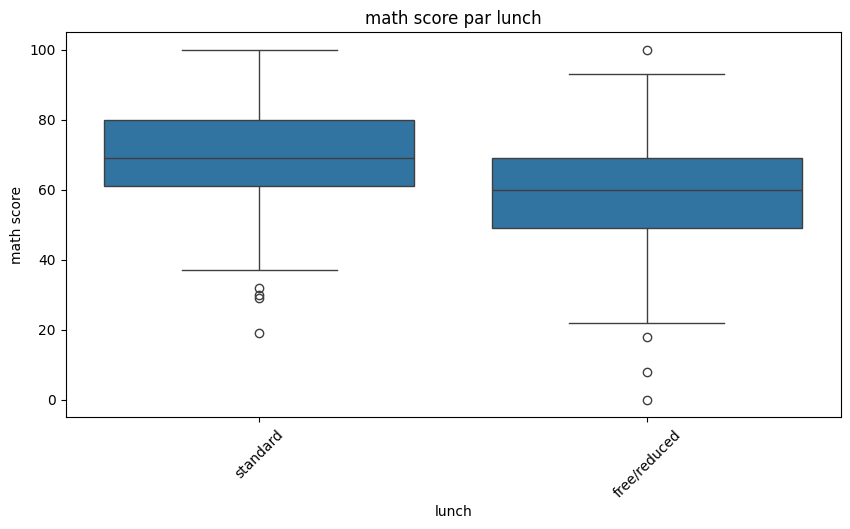

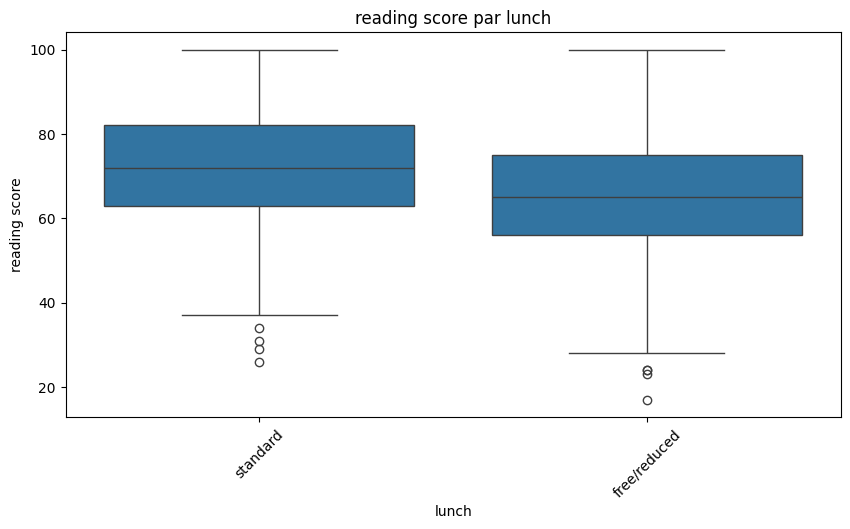

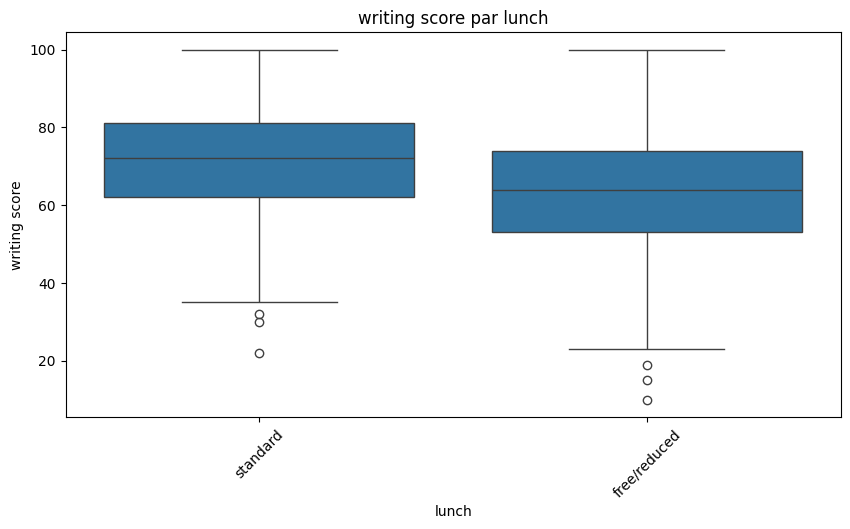

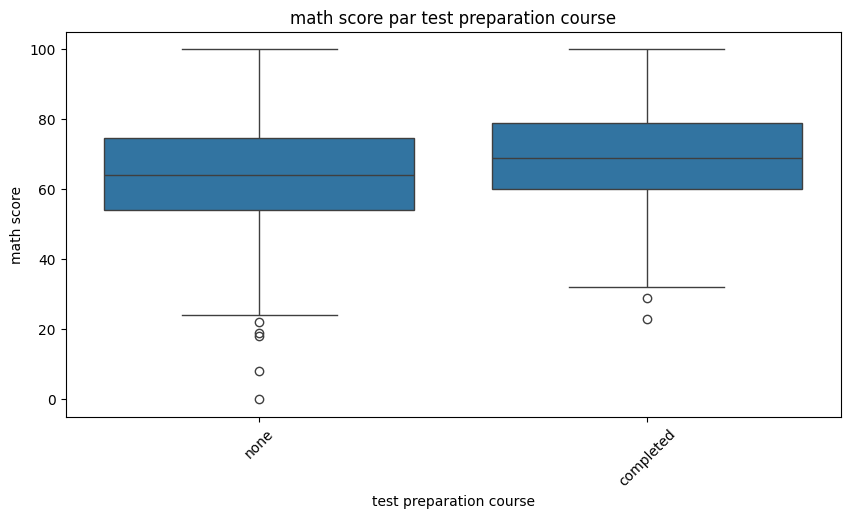

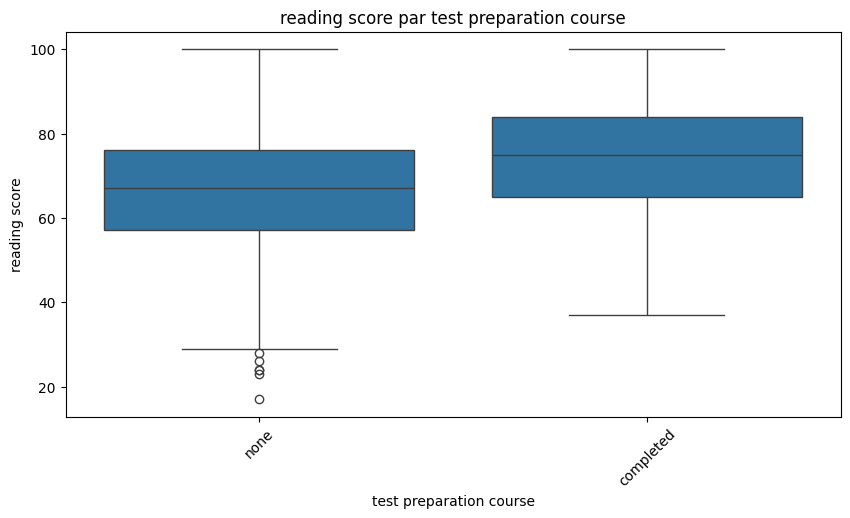

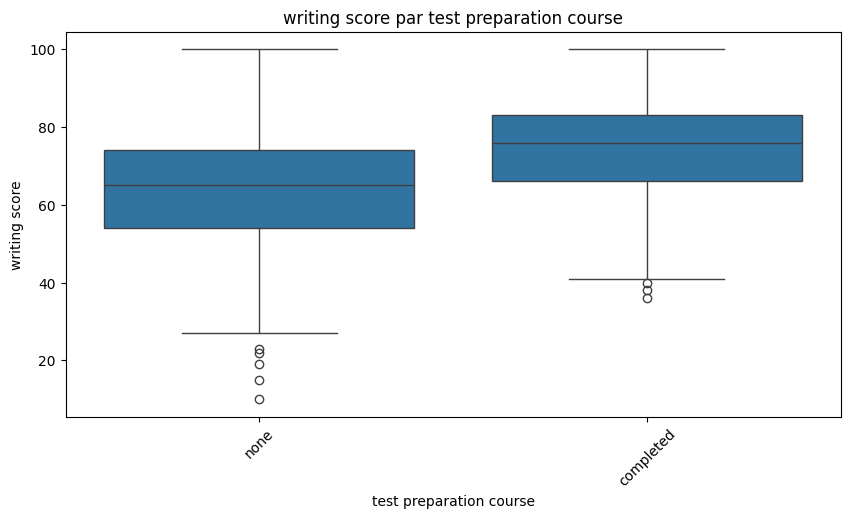

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Aperçu général du DataFrame
print("Aperçu des premières lignes:")
print(df.head())

print("\nInformations sur le DataFrame:")
print(df.info())

print("\nStatistiques descriptives pour les variables numériques:")
print(df.describe())

# 2. Analyse des variables catégorielles
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

print("\nDistribution des variables catégorielles:")
for col in categorical_cols:
    print(f"\nDistribution de {col}:")
    print(df[col].value_counts(normalize=True)*100)

    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution de {col}')
    plt.xticks(rotation=45)
    plt.show()

# 3. Analyse des variables numériques
numeric_cols = ['math score', 'reading score', 'writing score']

print("\nDistribution des variables numériques:")
for col in numeric_cols:
    plt.figure(figsize=(12,4))

    plt.subplot(1,2,1)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution de {col}')

    plt.subplot(1,2,2)
    sns.boxplot(data=df, x=col)
    plt.title(f'Boîte à moustaches de {col}')

    plt.show()

# 4. Relations entre variables numériques
print("\nMatrice de corrélation entre les scores:")
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Matrice de corrélation entre les scores")
plt.show()

# 5. Relation entre variables catégorielles et numériques
for cat_col in categorical_cols:
    for num_col in numeric_cols:
        plt.figure(figsize=(10,5))
        sns.boxplot(data=df, x=cat_col, y=num_col)
        plt.title(f'{num_col} par {cat_col}')
        plt.xticks(rotation=45)
        plt.show()

#Data cleaninig

In [ ]:
# A function to cap outliers (replace with closest non outlier value)
def cap_outliers(df, column):
  # Calculate Fences
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_fence = Q1 - 1.5 * IQR
  upper_fence = Q3 + 1.5 * IQR

  df[column] = df[column].clip(lower=lower_fence, upper=upper_fence)
  return df

In [ ]:
# Apply function to math score column outliers
df_cleaned = cap_outliers(df, "math score")
# Apply cap ouliers function to reading score column outliers
df_cleaned = cap_outliers(df_cleaned, "reading score")
# Apply cap ouliers function to writing score column outliers
df_cleaned = cap_outliers(df_cleaned, "writing score")

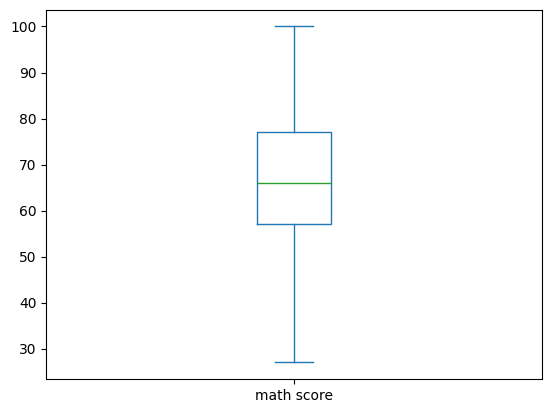

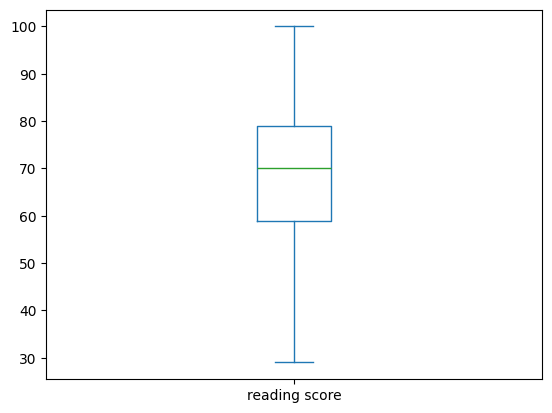

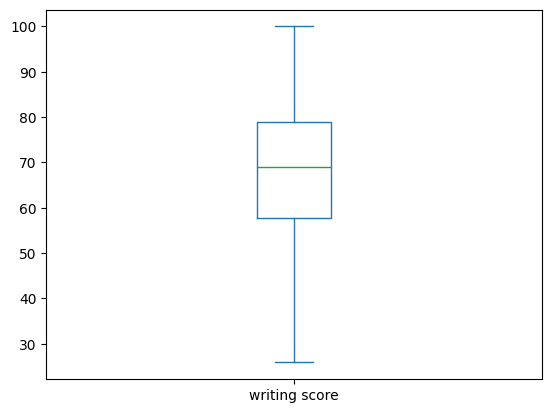

In [ ]:
# box plot math score
df_cleaned["math score"].plot.box()
plt.show()
df_cleaned["reading score"].plot.box()
plt.show()
df_cleaned["writing score"].plot.box()
plt.show()

Feature Engineering

In [ ]:
df_cleaned['total score']=df_cleaned['math score']+df_cleaned['reading score']+df_cleaned['writing score']
df_cleaned.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,female,group B,bachelor's degree,standard,none,72,72,74.0,218.0
1,female,group C,some college,standard,completed,69,90,88.0,247.0
2,female,group B,master's degree,standard,none,90,95,93.0,278.0
3,male,group A,associate's degree,free/reduced,none,47,57,44.0,148.0
4,male,group C,some college,standard,none,76,78,75.0,229.0


In [ ]:
df_cleaned['result']=df_cleaned['total score'].apply(lambda x: 'pass' if x>=150 else 'fail')
df_cleaned.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,result
0,female,group B,bachelor's degree,standard,none,72,72,74.0,218.0,pass
1,female,group C,some college,standard,completed,69,90,88.0,247.0,pass
2,female,group B,master's degree,standard,none,90,95,93.0,278.0,pass
3,male,group A,associate's degree,free/reduced,none,47,57,44.0,148.0,fail
4,male,group C,some college,standard,none,76,78,75.0,229.0,pass


In [ ]:
df_cleaned['result'].value_counts()

,count
result,
pass,897
fail,103


Encoding

In [ ]:
df_encoded=df_cleaned

In [ ]:
# One-Hot Encoding for race column
df_encoded = pd.get_dummies(
    df_cleaned,
    columns=["race/ethnicity"],
    prefix=["race"]
)
# label encode true and false in each race group column
race_groups = ["race_group A", "race_group B", "race_group C", "race_group D", "race_group E"]
for grp in race_groups:
  df_encoded[grp] = df_encoded[grp].map({True: 1, False: 0})

In [ ]:
df_encoded['lunch']=df_encoded['lunch'].apply(lambda x: 1 if x=='standard' else 0)

In [ ]:
df_encoded['gender']=df_encoded['gender'].apply(lambda x: 1 if x=='male' else 0)

In [ ]:
df_encoded['result']=df_encoded['result'].apply(lambda x: 1 if x=='pass' else 0)

In [ ]:
df_encoded['test preparation course']=df_encoded['test preparation course'].apply(lambda x: 1 if x=='completed' else 0)

In [ ]:
education_order = [
    "some high school",
    "high school",
    "some college",
    "associate's degree",
    "bachelor's degree",
    "master's degree"
]

# Map to integers
df_encoded["parental level of education"] = df_encoded["parental level of education"].map(
    {v: i for i, v in enumerate(education_order)}
)

In [ ]:
df_encoded.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,result,race_group A,race_group B,race_group C,race_group D,race_group E
0,0,4,1,0,72,72,74.0,218.0,1,0,1,0,0,0
1,0,2,1,1,69,90,88.0,247.0,1,0,0,1,0,0
2,0,5,1,0,90,95,93.0,278.0,1,0,1,0,0,0
3,1,3,0,0,47,57,44.0,148.0,0,1,0,0,0,0
4,1,2,1,0,76,78,75.0,229.0,1,0,0,1,0,0


In [ ]:
df_encoded.columns

Index(['gender', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'total score', 'result', 'race_group A',
       'race_group B', 'race_group C', 'race_group D', 'race_group E'],
      dtype='object')

In [ ]:
# Liste des colonnes à déplacer
cols_to_move = ['math score', 'reading score', 'writing score', 'total score', 'result']

# Autres colonnes (celles qui ne sont pas à déplacer)
other_cols = [col for col in df_encoded.columns if col not in cols_to_move]

# Réorganiser les colonnes
df_encoded = df_encoded[other_cols + cols_to_move]

In [ ]:
df_encoded

,gender,parental level of education,lunch,test preparation course,race_group A,race_group B,race_group C,race_group D,race_group E,math score,reading score,writing score,total score,result
0,0,4,1,0,0,1,0,0,0,72,72,74.0,218.0,1
1,0,2,1,1,0,0,1,0,0,69,90,88.0,247.0,1
2,0,5,1,0,0,1,0,0,0,90,95,93.0,278.0,1
3,1,3,0,0,1,0,0,0,0,47,57,44.0,148.0,0
4,1,2,1,0,0,0,1,0,0,76,78,75.0,229.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,5,1,1,0,0,0,0,1,88,99,95.0,282.0,1
996,1,1,0,0,0,0,1,0,0,62,55,55.0,172.0,1
997,0,1,0,1,0,0,1,0,0,59,71,65.0,195.0,1
998,0,2,1,1,0,0,0,1,0,68,78,77.0,223.0,1


# **Split**

In [ ]:
train_data.shape

(800, 14)

In [ ]:
df_encoded

,gender,parental level of education,lunch,test preparation course,race_group A,race_group B,race_group C,race_group D,race_group E,math score,reading score,writing score,total score,result
0,0,4,1,0,0,1,0,0,0,72,72,74.0,218.0,1
1,0,2,1,1,0,0,1,0,0,69,90,88.0,247.0,1
2,0,5,1,0,0,1,0,0,0,90,95,93.0,278.0,1
3,1,3,0,0,1,0,0,0,0,47,57,44.0,148.0,0
4,1,2,1,0,0,0,1,0,0,76,78,75.0,229.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,5,1,1,0,0,0,0,1,88,99,95.0,282.0,1
996,1,1,0,0,0,0,1,0,0,62,55,55.0,172.0,1
997,0,1,0,1,0,0,1,0,0,59,71,65.0,195.0,1
998,0,2,1,1,0,0,0,1,0,68,78,77.0,223.0,1


In [ ]:
test_data.shape

(200, 14)

In [ ]:
# Créer une nouvelle colonne 'reading_writing_score' qui est la moyenne des deux scores
df_encoded['reading_writing_score'] = (df_encoded['reading score'] + df_encoded['writing score']) / 2

# Afficher les premières lignes pour vérifier

 #Optionnel : Supprimer les anciennes colonnes si elles ne sont plus nécessaires
df_encoded = df_encoded.drop(columns=['reading score', 'writing score'])
# print("\nAprès suppression des colonnes originales:")
df_encoded.head()

,gender,parental level of education,lunch,test preparation course,race_group A,race_group B,race_group C,race_group D,race_group E,math score,total score,result,reading_writing_score
0,0,4,1,0,0,1,0,0,0,72,218.0,1,73.0
1,0,2,1,1,0,0,1,0,0,69,247.0,1,89.0
2,0,5,1,0,0,1,0,0,0,90,278.0,1,94.0
3,1,3,0,0,1,0,0,0,0,47,148.0,0,50.5
4,1,2,1,0,0,0,1,0,0,76,229.0,1,76.5


In [ ]:
df_encoded['total score'] = (df_encoded['total score'] / 3).round(2)

In [ ]:
df_encoded.head()

,gender,parental level of education,lunch,test preparation course,race_group A,race_group B,race_group C,race_group D,race_group E,math score,total score,result,reading_writing_score
0,0,4,1,0,0,1,0,0,0,72,72.67,1,73.0
1,0,2,1,1,0,0,1,0,0,69,82.33,1,89.0
2,0,5,1,0,0,1,0,0,0,90,92.67,1,94.0
3,1,3,0,0,1,0,0,0,0,47,49.33,0,50.5
4,1,2,1,0,0,0,1,0,0,76,76.33,1,76.5


In [ ]:
def get_mention(score):
    if score >= 90:
        return "Excellent"
    elif score >= 80:
        return "Very Good"
    elif score >= 70:
        return "Good"
    elif score >= 50:
        return "Pass"
    else:
        return "Fail"

df_encoded['mention'] = df_encoded['total score'].apply(get_mention)



In [ ]:
# Dictionnaire de mapping pour coder les mentions en nombres
mention_mapping = {
    "Excellent": 4,
    "Very Good": 3,
    "Good": 2,
    "Pass": 1,
    "Fail": 0
}

# Création de la colonne encodée
df_encoded['mention_code'] = df_encoded['mention'].map(mention_mapping)


In [ ]:
df_encoded.head()

,gender,parental level of education,lunch,test preparation course,race_group A,race_group B,race_group C,race_group D,race_group E,math score,total score,result,reading_writing_score,mention,mention_code
0,0,4,1,0,0,1,0,0,0,72,72.67,1,73.0,Good,2
1,0,2,1,1,0,0,1,0,0,69,82.33,1,89.0,Very Good,3
2,0,5,1,0,0,1,0,0,0,90,92.67,1,94.0,Excellent,4
3,1,3,0,0,1,0,0,0,0,47,49.33,0,50.5,Fail,0
4,1,2,1,0,0,0,1,0,0,76,76.33,1,76.5,Good,2


In [ ]:
df_encoded.drop(columns=['mention'], inplace=True)

In [ ]:
df_encoded.head()

,gender,parental level of education,lunch,test preparation course,race_group A,race_group B,race_group C,race_group D,race_group E,math score,total score,result,reading_writing_score,mention_code
0,0,4,1,0,0,1,0,0,0,72,72.67,1,73.0,2
1,0,2,1,1,0,0,1,0,0,69,82.33,1,89.0,3
2,0,5,1,0,0,1,0,0,0,90,92.67,1,94.0,4
3,1,3,0,0,1,0,0,0,0,47,49.33,0,50.5,0
4,1,2,1,0,0,0,1,0,0,76,76.33,1,76.5,2


In [ ]:
df_encoded.columns

Index(['gender', 'parental level of education', 'lunch',
       'test preparation course', 'race_group A', 'race_group B',
       'race_group C', 'race_group D', 'race_group E', 'math score',
       'total score', 'result', 'reading_writing_score', 'mention_code'],
      dtype='object')

In [ ]:
# Liste des colonnes dans l’ordre souhaité
cols = list(df_encoded.columns)

# Colonnes à déplacer
cols_to_move = ['reading_writing_score', 'math score', 'total score']

# Supprimer les colonnes à déplacer de la liste
for col in cols_to_move:
    cols.remove(col)

# Trouver la position de la colonne 'result'
result_index = cols.index('result')

# Insérer les colonnes à déplacer juste avant 'result'
for col in reversed(cols_to_move):  # reverse pour insérer dans le bon ordre
    cols.insert(result_index, col)

# Réorganiser le DataFrame
df_encoded = df_encoded[cols]


In [ ]:
df_encoded.head()

,gender,parental level of education,lunch,test preparation course,race_group A,race_group B,race_group C,race_group D,race_group E,reading_writing_score,math score,total score,result,mention_code
0,0,4,1,0,0,1,0,0,0,73.0,72,72.67,1,2
1,0,2,1,1,0,0,1,0,0,89.0,69,82.33,1,3
2,0,5,1,0,0,1,0,0,0,94.0,90,92.67,1,4
3,1,3,0,0,1,0,0,0,0,50.5,47,49.33,0,0
4,1,2,1,0,0,0,1,0,0,76.5,76,76.33,1,2


In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df_encoded, test_size=0.2, random_state=42, stratify=df_encoded['result'])

In [ ]:
# Sauvegarde en CSV
train_data.to_csv("train_data.csv", index=False)
test_data.to_csv("test_data.csv", index=False)
df_encoded.to_csv("data_preparation.csv", index=False)
